# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [467]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from datetime import datetime

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [468]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

#test_cities = cities[0:100]
#test_cities = cities.copy()
#print(test_cities)

583


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [469]:
# Setup the Endpoint url and units
url = "http://api.openweathermap.org/data/2.5/weather"
units = 'imperial'

# Create a dataframe to store results of the calls
column_names = {
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date",
}
cities_df = pd.DataFrame(columns=column_names)

# Loop through each city and call the weather api
i = 1
for city in cities:
        
    params = {
        "appid": weather_api_key,
        "q": city,
        "units": units,
    }
    
    weather_response = requests.get(url, params).json()
    
    #pprint(weather_response)
    
    # Check to make sure we got data for each of the cities
    try:
        new_row = {
            "City": city,
            "Lat": weather_response["coord"]["lat"],
            "Lng": weather_response["coord"]["lon"],
            "Max Temp": weather_response["main"]["temp_max"],
            "Humidity": weather_response["main"]["humidity"], 
            "Cloudiness": weather_response["clouds"]["all"],       
            "Wind Speed": weather_response["wind"]["speed"], 
            "Country":weather_response["sys"]["country"], 
            "Date": weather_response["dt"],
        }
        
        # Print and append the row to the dataframe
        print(f"Processing Record {i} of {len(cities)} | {city}")

        cities_df = cities_df.append(new_row, ignore_index=True)

        
    except (KeyError, IndexError):
        # Skip if anything is missing
        print(f"Skipping {city} as field or result was not present ({i})")
        
    i += 1
        

Processing Record 1 of 583 | port-gentil
Processing Record 2 of 583 | teahupoo
Skipping barentsburg as field or result was not present (3)
Processing Record 4 of 583 | rikitea
Processing Record 5 of 583 | mmathubudukwane
Processing Record 6 of 583 | sekoma
Processing Record 7 of 583 | nantucket
Processing Record 8 of 583 | gampengrejo
Processing Record 9 of 583 | georgetown
Skipping falealupo as field or result was not present (10)
Skipping bur gabo as field or result was not present (11)
Skipping samusu as field or result was not present (12)
Processing Record 13 of 583 | chicama
Processing Record 14 of 583 | mastung
Processing Record 15 of 583 | katsuura
Processing Record 16 of 583 | longyearbyen
Processing Record 17 of 583 | nome
Processing Record 18 of 583 | tual
Processing Record 19 of 583 | busselton
Processing Record 20 of 583 | ukiah
Processing Record 21 of 583 | virginia beach
Processing Record 22 of 583 | bluff
Processing Record 23 of 583 | aksay
Processing Record 24 of 583 |

Processing Record 198 of 583 | nampula
Processing Record 199 of 583 | huallanca
Processing Record 200 of 583 | saint-leu
Processing Record 201 of 583 | pontian kecil
Processing Record 202 of 583 | khotynets
Skipping bargal as field or result was not present (203)
Processing Record 204 of 583 | souillac
Processing Record 205 of 583 | hearst
Processing Record 206 of 583 | kassala
Processing Record 207 of 583 | biak
Processing Record 208 of 583 | balkhash
Processing Record 209 of 583 | axim
Processing Record 210 of 583 | khatanga
Processing Record 211 of 583 | sao borja
Processing Record 212 of 583 | lorengau
Processing Record 213 of 583 | harper
Processing Record 214 of 583 | barrow
Processing Record 215 of 583 | marystown
Processing Record 216 of 583 | bathsheba
Processing Record 217 of 583 | vardo
Processing Record 218 of 583 | ponta delgada
Processing Record 219 of 583 | nenjiang
Processing Record 220 of 583 | balabac
Processing Record 221 of 583 | xai-xai
Processing Record 222 of 583

Skipping tsihombe as field or result was not present (395)
Processing Record 396 of 583 | caravelas
Processing Record 397 of 583 | kharan
Processing Record 398 of 583 | atlantic city
Processing Record 399 of 583 | egvekinot
Processing Record 400 of 583 | luderitz
Processing Record 401 of 583 | maldonado
Processing Record 402 of 583 | brownwood
Processing Record 403 of 583 | piacabucu
Processing Record 404 of 583 | barkot
Processing Record 405 of 583 | fangshan
Processing Record 406 of 583 | husavik
Processing Record 407 of 583 | geraldton
Processing Record 408 of 583 | klyuchi
Processing Record 409 of 583 | tezu
Processing Record 410 of 583 | cockburn town
Processing Record 411 of 583 | rongcheng
Processing Record 412 of 583 | luwuk
Processing Record 413 of 583 | saint-francois
Processing Record 414 of 583 | cabedelo
Processing Record 415 of 583 | saint-joseph
Processing Record 416 of 583 | half moon bay
Processing Record 417 of 583 | muisne
Processing Record 418 of 583 | the valley
Pr

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [470]:
# Redorder the columns
cities_df = cities_df[[
    "City",        
    "Lat",
    "Lng",
    "Max Temp",
    "Humidity", 
    "Cloudiness",       
    "Wind Speed", 
    "Country", 
    "Date"
]]

In [471]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.72,8.78,77.88,85,100,9.80,GA,1603854377
1,teahupoo,-17.83,-149.27,82.40,74,40,13.87,PF,1603854378
2,rikitea,-23.12,-134.97,75.45,84,100,14.90,PF,1603854264
3,mmathubudukwane,-24.60,26.43,68.00,42,0,8.05,BW,1603854378
4,sekoma,-24.40,23.88,73.96,30,0,13.24,BW,1603854379
...,...,...,...,...,...,...,...,...,...
526,sao gabriel da cachoeira,-0.13,-67.09,76.17,93,97,0.67,BR,1603854525
527,acarau,-2.89,-40.12,76.98,85,100,10.29,BR,1603854526
528,warrington,53.39,-2.58,46.40,93,100,12.75,GB,1603854279
529,araouane,18.90,-3.53,83.48,15,0,4.94,ML,1603854526


In [472]:
cities_df.to_csv(output_data_file)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [473]:
# Check the data types to ensure we have numbers
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity       object
Cloudiness     object
Wind Speed    float64
Country        object
Date           object
dtype: object

In [474]:
cities_df["Max Temp"] = cities_df["Max Temp"].astype('float')
cities_df["Humidity"] = cities_df["Humidity"].astype('float')
cities_df["Cloudiness"] = cities_df["Cloudiness"].astype('float')
cities_df["Date"] = cities_df["Date"].astype('int')

In [475]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,5.310000e+02
mean,18.907439,18.364934,58.092354,73.905838,52.760829,7.308079,1.603854e+09
std,33.714877,89.536331,21.802234,20.443262,40.888081,5.246759,1.898857e+02
min,-54.800000,-179.170000,-6.750000,1.000000,0.000000,0.180000,1.603854e+09
25%,-8.120000,-58.695000,44.125000,64.000000,1.000000,3.360000,1.603854e+09
50%,21.460000,23.880000,62.600000,79.000000,62.000000,5.820000,1.603854e+09
75%,47.695000,101.800000,75.835000,90.000000,93.500000,10.415000,1.603854e+09
max,78.220000,179.320000,94.060000,100.000000,100.000000,41.920000,1.603855e+09


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [197]:
# test lines, remove later
#cities_df.loc[0, "Humidity"] = 105
#cities_df.loc[3, "Humidity"] = 121

In [476]:
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.72,8.78,77.88,85.0,100.0,9.80,GA,1603854377
1,teahupoo,-17.83,-149.27,82.40,74.0,40.0,13.87,PF,1603854378
2,rikitea,-23.12,-134.97,75.45,84.0,100.0,14.90,PF,1603854264
3,mmathubudukwane,-24.60,26.43,68.00,42.0,0.0,8.05,BW,1603854378
4,sekoma,-24.40,23.88,73.96,30.0,0.0,13.24,BW,1603854379
...,...,...,...,...,...,...,...,...,...
526,sao gabriel da cachoeira,-0.13,-67.09,76.17,93.0,97.0,0.67,BR,1603854525
527,acarau,-2.89,-40.12,76.98,85.0,100.0,10.29,BR,1603854526
528,warrington,53.39,-2.58,46.40,93.0,100.0,12.75,GB,1603854279
529,araouane,18.90,-3.53,83.48,15.0,0.0,4.94,ML,1603854526


In [477]:
cities_hum_over_100_list = cities_df[cities_df["Humidity"] > 100].index.to_list()

In [478]:
print(cities_hum_over_100_list)

[]


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [479]:
clean_city_data = cities_df.drop(cities_df.index[cities_hum_over_100_list], inplace=False).reset_index(drop=True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-gentil,-0.72,8.78,77.88,85.0,100.0,9.80,GA,1603854377
1,teahupoo,-17.83,-149.27,82.40,74.0,40.0,13.87,PF,1603854378
2,rikitea,-23.12,-134.97,75.45,84.0,100.0,14.90,PF,1603854264
3,mmathubudukwane,-24.60,26.43,68.00,42.0,0.0,8.05,BW,1603854378
4,sekoma,-24.40,23.88,73.96,30.0,0.0,13.24,BW,1603854379
...,...,...,...,...,...,...,...,...,...
526,sao gabriel da cachoeira,-0.13,-67.09,76.17,93.0,97.0,0.67,BR,1603854525
527,acarau,-2.89,-40.12,76.98,85.0,100.0,10.29,BR,1603854526
528,warrington,53.39,-2.58,46.40,93.0,100.0,12.75,GB,1603854279
529,araouane,18.90,-3.53,83.48,15.0,0.0,4.94,ML,1603854526


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [480]:
def plot_scatter(x, y, x_label, y_label, title, marker, color, edgecolor, with_regression = False, equation_label_position=(0,0)):   

    fig, ax = plt.subplots()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True)
    
    if with_regression:

        slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
        regress_values = x * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        print(f"The r-value is: {rvalue}")
        ax.annotate(line_eq, equation_label_position, fontsize=15, color="red")
        ax.plot(x, regress_values, "r-")
        
    ax.scatter(x, y, marker=marker, facecolor=color, edgecolor=edgecolor) 
    

In [481]:
now = datetime.now()
analysis_date = now.strftime("%m/%d/%Y")
x_label="Latitude"
max_temp_label = "Max Temperature (F)"
humidity_label = "Humidity (%)"
cloud_label = "Cloudiness (%)"
wind_label = "Wind Speed (MPH)"

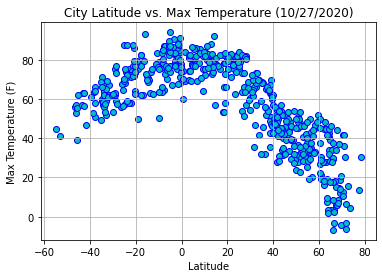

In [482]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude vs. Max Temperature ({analysis_date})",
    "o",
    "c",
    "b"
)


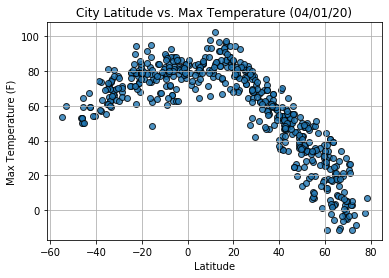

## Latitude vs. Humidity Plot

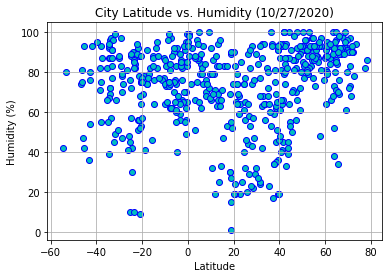

In [483]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude vs. Humidity ({analysis_date})",
    "o",
    "c",
    "b"
)

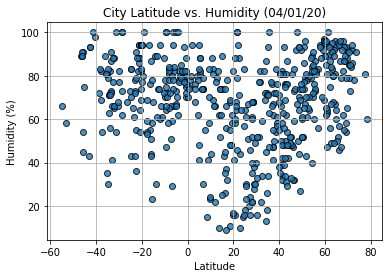

## Latitude vs. Cloudiness Plot

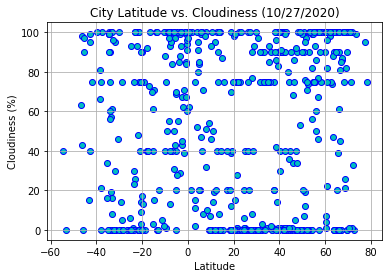

In [484]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude vs. Cloudiness ({analysis_date})",
    "o",
    "c",
    "b"
)

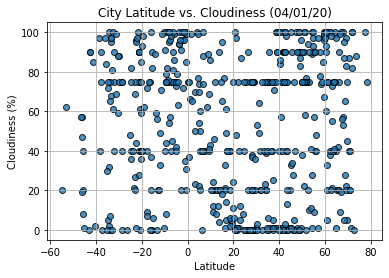

## Latitude vs. Wind Speed Plot

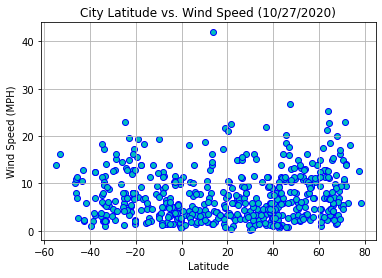

In [485]:
plot_scatter(
    clean_city_data["Lat"], 
    clean_city_data["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude vs. Wind Speed ({analysis_date})",
    "o",
    "c",
    "b"
)

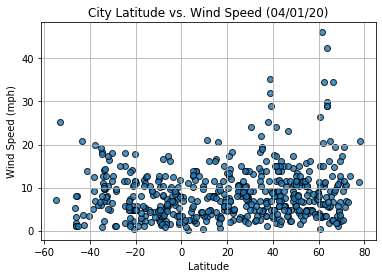

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [486]:
northern_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]

The r-value is: -0.8755268071886083


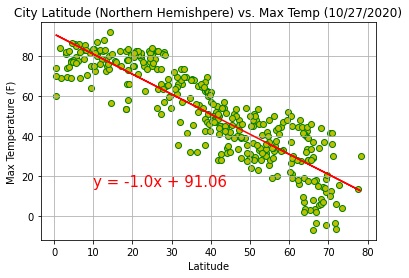

In [487]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Northern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (10,15)
)

The r-value is: 0.46937863826630627


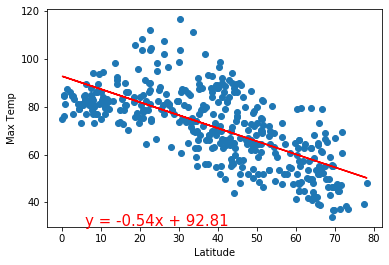

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [488]:
southern_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]

The r-value is: 0.7338713856893706


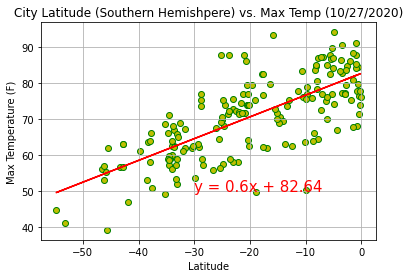

In [489]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Max Temp"], 
    x_label, 
    max_temp_label, 
    f"City Latitude (Southern Hemishpere) vs. Max Temp ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-30,50)
)

The r-value is: 0.6082708688906918


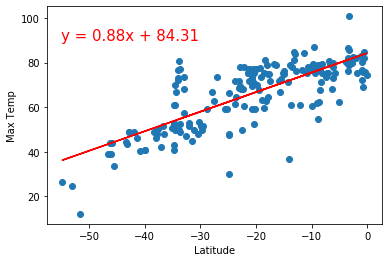

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31140114496808563


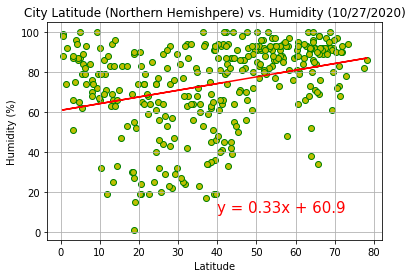

In [490]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Northern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.000543987878808455


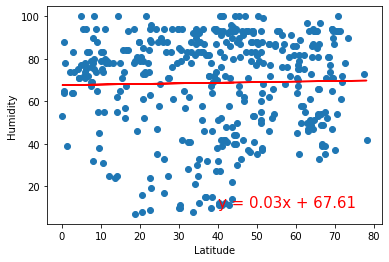

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0829059077625404


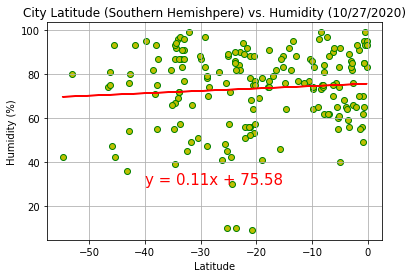

In [491]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Humidity"], 
    x_label, 
    humidity_label, 
    f"City Latitude (Southern Hemishpere) vs. Humidity ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,30)
)

The r-value is: 0.014985174297345524


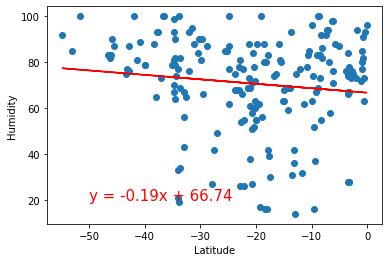

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17677989307380756


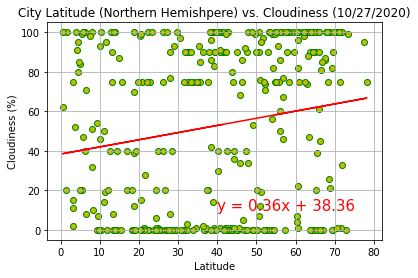

In [492]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Northern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.0020898727664228514


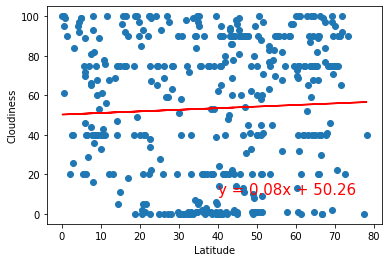

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.24127432776348562


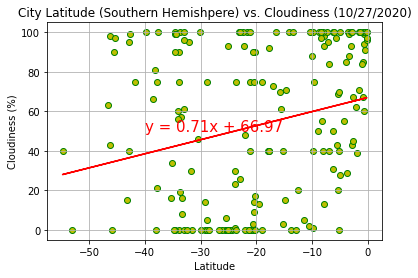

In [493]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Cloudiness"], 
    x_label, 
    cloud_label, 
    f"City Latitude (Southern Hemishpere) vs. Cloudiness ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,50)
)

The r-value is: 0.0035263772085582894


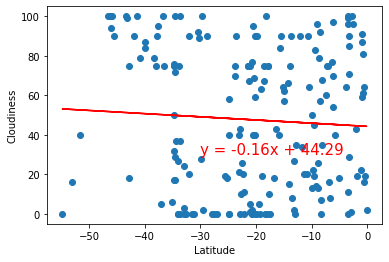

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17447758907855374


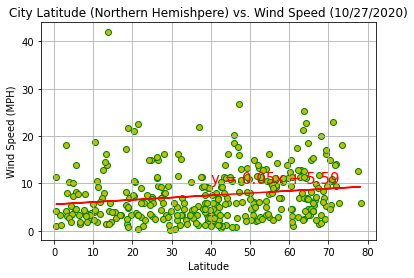

In [494]:
plot_scatter(
    northern_hemisphere["Lat"], 
    northern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Northern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (40,10)
)

The r-value is: 0.04019723576144484


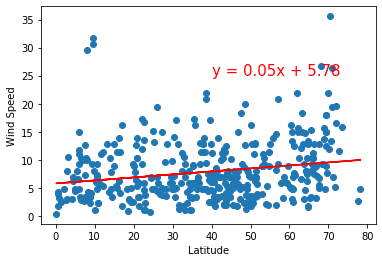

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.19226648687938622


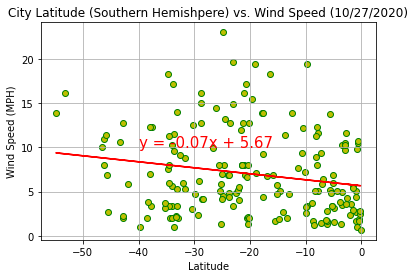

In [495]:
plot_scatter(
    southern_hemisphere["Lat"], 
    southern_hemisphere["Wind Speed"], 
    x_label, 
    wind_label, 
    f"City Latitude (Southern Hemishpere) vs. Wind Speed ({analysis_date})",
    "o",
    "y",
    "g",
    True,
    (-40,10)
)

The r-value is: 0.017128274759839232


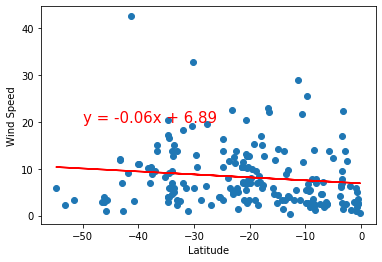